In [5]:
## import modules need 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split as tts 
from  sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder,OrdinalEncoder,OneHotEncoder 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from xgboost import XGBRegressor  
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## Import Data 

In [6]:
# import data  
train = 'train.csv' 
test = 'test.csv'
data_train = pd.read_csv(train) 
data_test = pd.read_csv(test)  


In [7]:
# shape for train set and test set 
# we have 81 features in the train set & 1460 samples 
#80 features in the test set 
print('the number of features in the train set is {}.'.format(data_train.shape[1])) 
print('\n') 
print('the number of features in the test set is {}.'.format(data_test.shape[1])) 

the number of features in the train set is 81.


the number of features in the test set is 80.


In [9]:
#Let's check if the features in two data sets are the same. 
data_train.columns.tolist()[:-1] ==  data_test.columns.tolist() 

True

## Look at Data 

In [5]:
# look the data 
data_train.head().style.background_gradient(cmap = 'viridis')  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


In [10]:
#description for the dataset 
data_train.describe().transpose().style.background_gradient(cmap = 'magma') 

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


## Feature Engineering 

In [11]:
#feature engineer 
# check if have null value in the train set and test set features
def check_null_value(data): 
    """
    data is train_data and test data 
    we want to know which column has null values
    """
    data_null =  pd.DataFrame(data.isnull().mean() ,columns = ['null rate']) .reset_index()  
    data_null.columns = ['column name', 'null rates']  
    
    null_value_feature = [] 
    for value in zip(data_null.loc[:,'column name'].tolist(),data_null.loc[:,'null rates'].tolist()): 
        if value[1] >0: 
            null_value_feature.append(value[0]) 
        else: 
            continue 
    return null_value_feature  

In [12]:
# the features in train set  has null values 
check_null_value(data_train)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [13]:
# the features in test set  has null values 
check_null_value(data_test) 

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [14]:
#how many features which have null values in trainset and test set 
print('there are {} features which have nan  in the train set'.format(len(check_null_value(data_train)))) 
print('\n') 
print('there are {} features which have nan in the test set'.format(len(check_null_value(data_test)))) 

there are 19 features which have nan  in the train set


there are 33 features which have nan in the test set


### NA value in train set 

In [15]:
#infomation of the train data set  
data_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
# Dealing with null values in categorical features 
# those features have large number of null values so we directly drop it 
data_train.drop(['Id','Alley','PoolQC','MiscFeature','FireplaceQu','Fence',],axis = 1,inplace = True)

In [17]:
# we ve done drop them 
# remove them in our feature null value list 
#how many features left 
print('there are {} features which have nan value in the train set not deal'.format(len(check_null_value(data_train)))) 
print('\n') 
print(check_null_value(data_train))  

there are 14 features which have nan value in the train set not deal


['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [18]:
#Dealing with null values in other categorical features 
cate = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType',
  'GarageYrBlt','GarageFinish', 'GarageQual', 'GarageCond'] 

#use mode to fill in 
for col in cate: 
    data_train[col].fillna(data_train[col].mode()[0] ,inplace = True)  # use mode 

#check null value  
print('there are {} features which have nan value in the train set not deal'.format(len(check_null_value(data_train)))) 
print('\n') 
print(check_null_value(data_train)) 

there are 2 features which have nan value in the train set not deal


['LotFrontage', 'MasVnrArea']


In [19]:
#use median value  to fill in MasVnrArea 
data_train['MasVnrArea'].fillna(data_train['MasVnrArea'].mean(),inplace = True) 

In [20]:
# check null value 
print('there are {} features which have nan value in the train set not deal'.format(len(check_null_value(data_train)))) 
print('\n') 
print(check_null_value(data_train)) 

there are 1 features which have nan value in the train set not deal


['LotFrontage']


In [21]:
#use linear regression to fill na in LotFrontage 
y = data_train['LotFrontage']
X = data_train['LotArea']
Ytrain = y[y.notnull()]
Ytest = y[y.isnull()] 
Xtrain =X[Ytrain.index]
Xtest = X[Ytest.index] 

In [22]:
Xtrain = Xtrain.to_numpy().reshape(-1,1)  
Ytrain = Ytrain.to_numpy().reshape(-1,1) 
Xtest = Xtest.to_numpy().reshape(-1,1) 

In [23]:
lm = LinearRegression().fit(Xtrain,Ytrain)
Ypredict = lm.predict(Xtest) 

In [24]:
#replace the na value in lotfrontage
data_train.loc[data_train['LotFrontage'].isnull(),'LotFrontage'] = Ypredict 

In [25]:
# check how many null value left
print('there are {} features which have nan value in the train set not deal'.format(len(check_null_value(data_train)))) 

there are 0 features which have nan value in the train set not deal


### NA value in test set 

In [26]:
#take a look about test set 
data_test.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [27]:
# Dealing with null values in categorical features 
# those features have large number of null values 
data_test.drop(['Id','Alley','PoolQC','MiscFeature','FireplaceQu','Fence',],axis = 1,inplace = True) 

In [28]:
null_list_test = check_null_value(data_test) 
len(null_list_test)  

28

In [29]:
#Dealing with null values in other categorical features 
cate_test = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType',
             'GarageYrBlt','GarageFinish', 'GarageQual', 'GarageCond','SaleType','Functional','KitchenQual','BsmtFullBath','BsmtHalfBath',
       'Utilities','Exterior2nd','Exterior1st','MSZoning','BsmtFinSF1']

In [30]:
#use mode to fill in 
for col in cate_test: 
    data_test[col].fillna(data_test[col].mode()[0] ,inplace = True) 

#check null value  left
print('there are {} features which have nan value in the train set not deal'.format(len(check_null_value(data_test)))) 
print('\n') 
print(check_null_value(data_test))  

there are 7 features which have nan value in the train set not deal


['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']


In [31]:
# use mean value to fill in 
for col in ['MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','GarageCars', 'GarageArea']: 
    data_test[col].fillna(data_test[col].mean() ,inplace = True)   
    
#check null value  left
check_null_value(data_test)  

['LotFrontage']

In [32]:
#use linear regression to fill na 
y = data_test['LotFrontage']
X = data_test['LotArea']
Ytrain = y[y.notnull()]
Ytest = y[y.isnull()] 
Xtrain =X[Ytrain.index]
Xtest = X[Ytest.index] 

Xtrain = Xtrain.to_numpy().reshape(-1,1)  
Ytrain = Ytrain.to_numpy().reshape(-1,1) 
Xtest = Xtest.to_numpy().reshape(-1,1) 

lm = LinearRegression().fit(Xtrain,Ytrain)
Ypredict = lm.predict(Xtest) 

#replace the na value in lotfrontage
data_test.loc[data_test['LotFrontage'].isnull(),'LotFrontage'] = Ypredict  

In [33]:
#check null value  left
print('there are {} features which have nan value in the test set not deal'.format(len(check_null_value(data_test)))) 

there are 0 features which have nan value in the test set not deal


check the shape of the train set and test set 

In [34]:
data_train.shape, data_test.shape 

((1460, 75), (1459, 74))

### Train Set and Test Set Encode 

In [35]:
def encode(data,ordinal_fea,onehot_fea): 
    """ 
    data is train_set or test set 
    this function is to encode the categorical features in the data set 
    """   
    data.loc[:,ordinal_fea] = OrdinalEncoder().fit_transform(data.loc[:,ordinal_fea]) 
    data_cat = pd.get_dummies(data.loc[:,onehot_fea]) 
    data = pd.concat([data,data_cat],axis =1)
    data.drop(onehot_fea,axis = 1,inplace = True)  
    
    return data 

In [36]:
# Now we finish processing the nan value 
# encode the categorical feature 
# select type = object and type = int or float features  
#create list for that 
cate_feat = list(data_train.select_dtypes(include = [object]).columns) 
num_feat =list(data_train.select_dtypes(include = ['int64','float64']).columns) 

print(cate_feat) 
print('\n') 
print(num_feat) 

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscV

In [37]:
# so we can encode right now  
# use ordinal encode and one hot encode 
# ordianl encode first 
ordinal_fea = ['LotShape','LandContour','LandSlope','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
               'KitchenQual','Functional','GarageFinish','GarageQual','GarageCond'] 
onehot_fea =[ele for ele in cate_feat if ele not in ordinal_fea] 

In [38]:
data_train = encode(data_train, ordinal_fea, onehot_fea) 
data_test = encode(data_test,ordinal_fea,onehot_fea) 

In [39]:
data_train,data_test  = data_train.align(data_test,join = 'left',axis = 1) 

### Modeling Cross Validation 

In [40]:
#  k fold cross validation 
X = data_train.loc[:,data_train.columns!='SalePrice'].to_numpy() 
y = data_train['SalePrice'].to_numpy().reshape(-1,1)

In [41]:
#linear regression -1st round see see 
lm = LinearRegression() 

In [42]:
# 5 fold cross validation 
scores = cross_val_score(lm, X, y, cv=5,scoring = 'neg_root_mean_squared_error').mean()
-scores 

34313.0423060174

In [43]:
score_r2= cross_val_score(lm, X, y, cv=5).mean()
score_r2

0.8088489034836103

In [44]:
#Random Forest Regressor -1st round see see 
rfc = RandomForestRegressor(n_estimators = 150,max_depth = 50, random_state = 420) 
scores = cross_val_score(rfc, X, y, cv=5,scoring = 'neg_root_mean_squared_error').mean() #RMSE
score_r2= cross_val_score(rfc, X, y, cv=5).mean() #r2 

-scores,score_r2 

(29992.95466448487, 0.8555878216451973)

In [45]:
# GradientBoostingRegressor -1st round see see 
gb = GradientBoostingRegressor(learning_rate = 0.2,n_estimators = 150,random_state = 420)
scores = cross_val_score(gb, X, y, cv=5,scoring = 'neg_root_mean_squared_error').mean() #RMSE
score_r2= cross_val_score(gb, X, y, cv=5).mean() #r2 

-scores,score_r2 

(25962.813926568477, 0.8906386086856652)

In [46]:
# xgboost - 1st round see see 
xgb = XGBRegressor(learning_rate = 0.2,n_estimators = 100,random_state = 420) 
scores = cross_val_score(xgb, X, y, cv=5,scoring = 'neg_root_mean_squared_error').mean() #RMSE
score_r2= cross_val_score(xgb, X, y, cv=5).mean() #r2 

-scores,score_r2  

(28470.370429304498, 0.8700980635733842)

the maximum of the r2 score is 0.8703128393114433


the minimum of the rmse is 28447.18333529775, the n_estiamtors value is 120


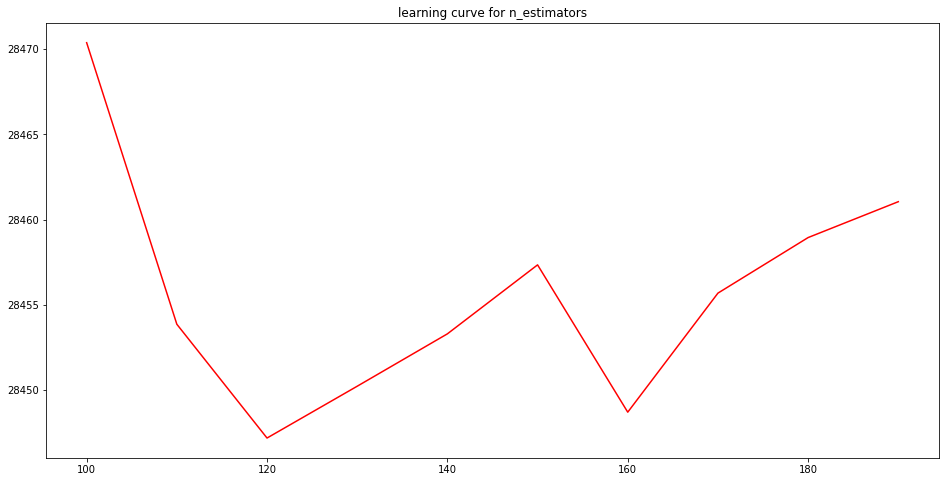

In [47]:
# try to see learning curve for the n_estimators 
n_estimators = range(100,200,10) 
cv = 5
r2_score = [] 
rmse = [] 
for i in n_estimators: 
    xgb = XGBRegressor(learning_rate = 0.2,n_estimators = i,random_state = 420) 
    scores = cross_val_score(xgb, X, y, cv=cv,scoring = 'neg_root_mean_squared_error').mean() #RMSE
    score_r2= cross_val_score(xgb, X, y, cv=cv).mean() #r2  
    r2_score.append(score_r2) 
    rmse.append(-scores) 
print('the maximum of the r2 score is {}'.format(max(r2_score))) 
print('\n') 
print('the minimum of the rmse is {}, the n_estiamtors value is {}'.format(min(rmse),n_estimators[rmse.index(min(rmse))])) 
      
plt.figure(figsize = (16,8)) 
plt.plot(n_estimators,rmse,c = 'red') 
plt.title('learning curve for n_estimators')
plt.show() 

the maximum of the r2 score is 0.880841671403747


the minimum of the rmse is 27312.18486207839, the learning_rate value is 0.25


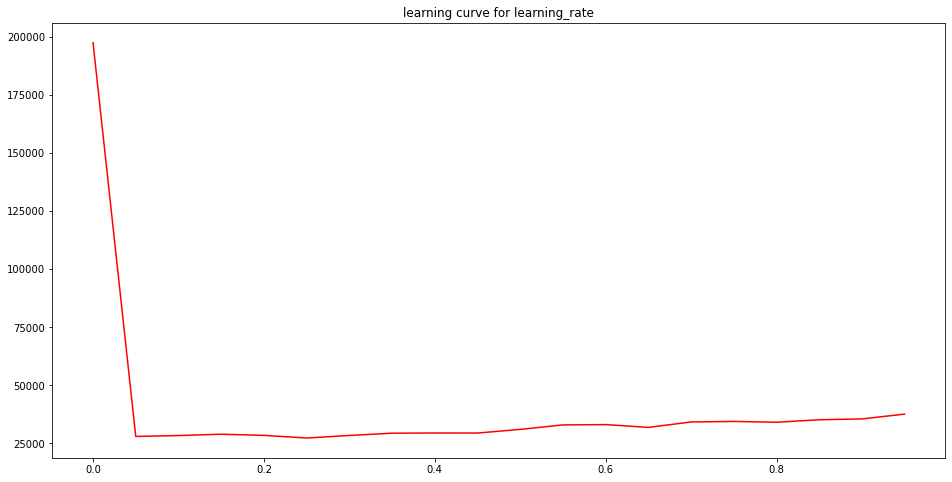

In [48]:
learning_rate = np.arange(0.0,1.0,0.05) 
cv = 5
r2_score = [] 
rmse = [] 
for i in learning_rate: 
    xgb = XGBRegressor(learning_rate = i,n_estimators = 190,random_state = 420) 
    scores = cross_val_score(xgb, X, y, cv=cv,scoring = 'neg_root_mean_squared_error').mean() #RMSE
    score_r2= cross_val_score(xgb, X, y, cv=cv).mean() #r2  
    r2_score.append(score_r2) 
    rmse.append(-scores) 
print('the maximum of the r2 score is {}'.format(max(r2_score))) 
print('\n') 
print('the minimum of the rmse is {}, the learning_rate value is {}'.format(min(rmse),learning_rate[rmse.index(min(rmse))])) 
      
plt.figure(figsize = (16,8)) 
plt.plot(learning_rate,rmse,c = 'red') 
plt.title('learning curve for learning_rate') 
plt.show() 

the maximum of the r2 score is 0.8928877639496676


the minimum of the rmse is 25871.78237841749, the subsample value is 0.631578947368421


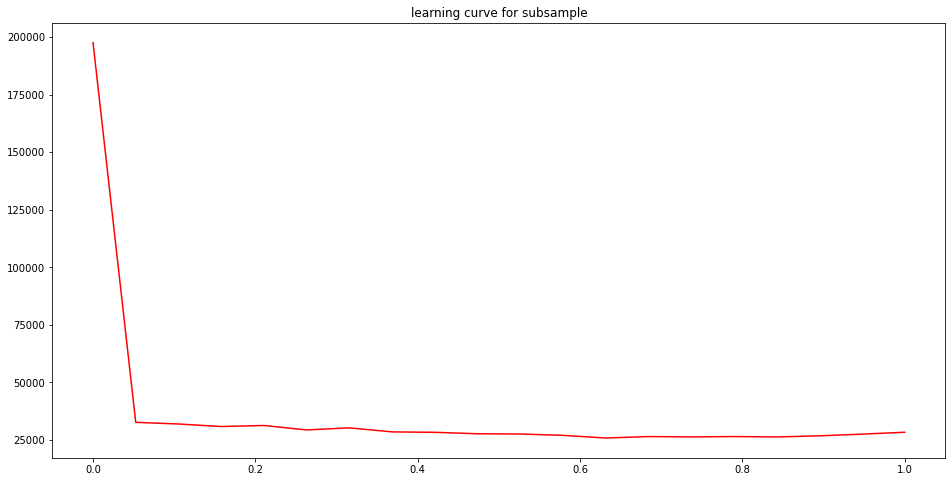

In [49]:
#subsample 
sub_sample = np.linspace(0,1,20) 
cv = 5
r2_score = [] 
rmse = [] 
for i in sub_sample: 
    xgb = XGBRegressor(learning_rate = 0.1,n_estimators = 190,random_state = 420,subsample = i) 
    scores = cross_val_score(xgb, X, y, cv=cv,scoring = 'neg_root_mean_squared_error').mean() #RMSE
    score_r2= cross_val_score(xgb, X, y, cv=cv).mean() #r2  
    r2_score.append(score_r2) 
    rmse.append(-scores) 
print('the maximum of the r2 score is {}'.format(max(r2_score))) 
print('\n') 
print('the minimum of the rmse is {}, the subsample value is {}'.format(min(rmse),sub_sample[rmse.index(min(rmse))])) 
      
plt.figure(figsize = (16,8)) 
plt.plot(sub_sample,rmse,c = 'red') 
plt.title('learning curve for subsample') 
plt.show() 

the maximum of the r2 score is 0.8930925127099012


the minimum of the rmse is 25846.64660483385, the n_estiamtors value is 240


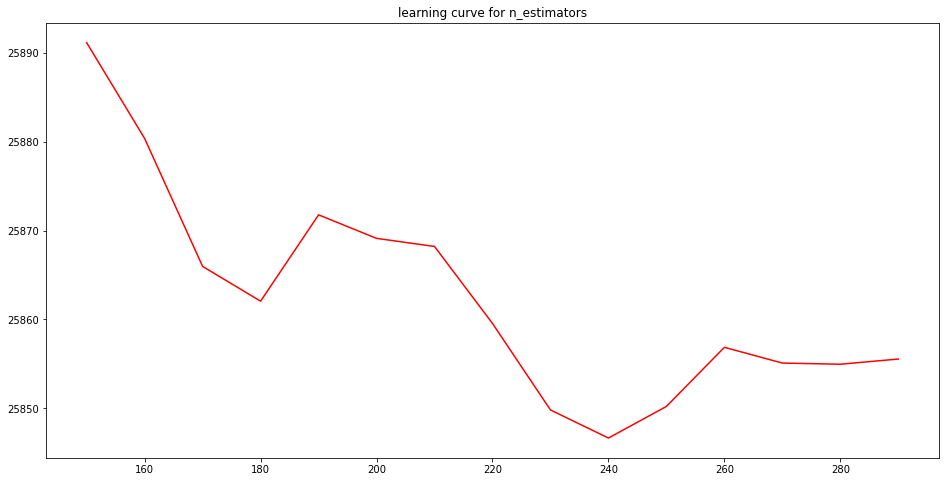

In [50]:
#last try to see n_estimators again 
n_estimators = range(150,300,10) 
cv = 5
r2_score = [] 
rmse = [] 
for i in n_estimators: 
    xgb = XGBRegressor(learning_rate = 0.1,n_estimators = i,random_state = 420,subsample =0.631578947368421) 
    scores = cross_val_score(xgb, X, y, cv=cv,scoring = 'neg_root_mean_squared_error').mean() #RMSE
    score_r2= cross_val_score(xgb, X, y, cv=cv).mean() #r2  
    r2_score.append(score_r2) 
    rmse.append(-scores) 
print('the maximum of the r2 score is {}'.format(max(r2_score))) 
print('\n') 
print('the minimum of the rmse is {}, the n_estiamtors value is {}'.format(min(rmse),n_estimators[rmse.index(min(rmse))])) 
      
plt.figure(figsize = (16,8)) 
plt.plot(n_estimators,rmse,c = 'red') 
plt.title('learning curve for n_estimators')
plt.show()  

since we find the best parameters for xgboost model </br> 
n_estimators = 240, learning_rate = 0.1,random_state = 420, subsample = 0.631578947368421 </br> 
rmse = 25846.64660483385

### Prediction 

In [51]:
# prediction 
Xtest= data_test.loc[:,data_test.columns !='SalePrice'].to_numpy()
xgb = XGBRegressor(learning_rate = 0.1
                    ,n_estimators = 240
                   ,random_state = 420
                   ,subsample =0.631578947368421).fit(X,y)  

ypred = xgb.predict(Xtest) 

In [52]:
prediction_price = pd.DataFrame(data = {'Id':range(1461,2920),'SalePrice':ypred},index = None )

In [53]:
prediction_price 

,Id,SalePrice
0,1461,131691.671875
1,1462,156427.578125
2,1463,185234.031250
3,1464,185337.828125
4,1465,192670.296875
...,...,...
1454,2915,75108.492188
1455,2916,78086.789062
1456,2917,168149.140625
1457,2918,115060.070312


In [112]:
#final export our result as csv file 
prediction_price.to_csv('Prediction for House Price.csv')